Factors Influencing Life Expectancy using Linear Regression¶


Attribute Information:
Country: Country
Year: Year
Status: Developed or Developing status
Life expectancy: Life Expectancy in age
Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
infant deaths: Number of Infant Deaths per 1000 population
Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
Measles: Measles - number of reported cases per 1000 population
BMI: Average Body Mass Index of entire population
under-five deaths: Number of under-five deaths per 1000 population
Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)
Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)
GDP: Gross Domestic Product per capita (in USD)
Population: Population of the country
thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)
Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
Schooling: Number of years of Schooling(years)

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load and explore the data

In [3]:
# Load the data into pandas dataframe
data = pd.read_csv('Life Expectancy Data.csv')   

Overview of the data

In [4]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
# Check number of rows and columns
data.shape

(2938, 22)

In [6]:
# Have a look at the column names
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness  1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
# Check column types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   Infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
# remove the rows of data which have missing value(s)
data = data.dropna()

In [9]:
# Check the unique values in each column of the dataframe.
data.nunique()

Country                             133
Year                                 16
Status                                2
Life expectancy                     320
Adult Mortality                     369
Infant deaths                       165
Alcohol                             833
Percentage expenditure             1645
Hepatitis B                          83
Measles                             603
BMI                                 538
Under-five deaths                   199
Polio                                68
Total expenditure                   669
Diphtheria                           66
HIV/AIDS                            167
GDP                                1649
Population                         1647
Thinness  1-19 years                179
Thinness 5-9 years                  185
Income composition of resources     548
Schooling                           147
dtype: int64

 "Status" and "Country" is object. So, we need to convert them to categorical type for further processing in the next steps.

Data Visualization¶

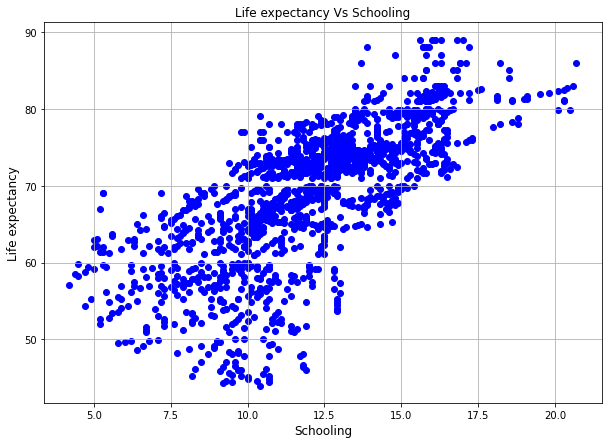

In [12]:
plt.figure(figsize=(10,7))
plt.scatter(data['Schooling'], data['Life expectancy'], color='blue')
plt.title('Life expectancy Vs Schooling', fontsize=12)
plt.xlabel('Schooling', fontsize=12)
plt.ylabel('Life expectancy', fontsize=12)
plt.grid(True)
plt.show()

Bivariate Analysis -  Target Variable to better understand the data

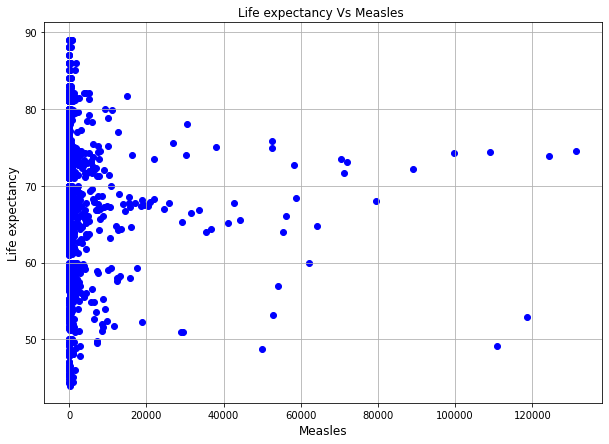

In [13]:
plt.figure(figsize=(10,7))
plt.scatter(data['Measles'], data['Life expectancy'], color='blue')
plt.title('Life expectancy Vs Measles ', fontsize=12)
plt.xlabel('Measles', fontsize=12)
plt.ylabel('Life expectancy', fontsize=12)
plt.grid(True)
plt.show()

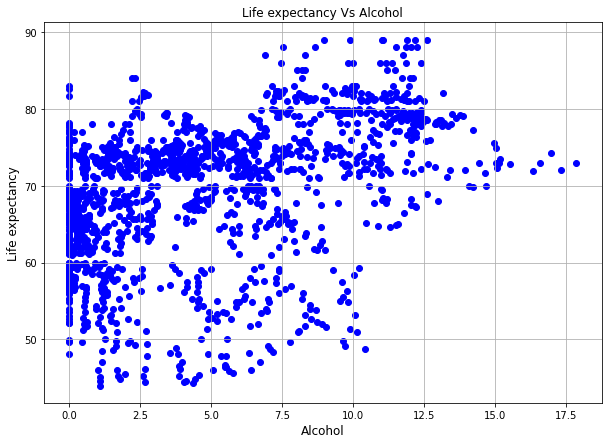

In [14]:
plt.figure(figsize=(10,7))
plt.scatter(data['Alcohol'], data['Life expectancy'], color='blue')
plt.title('Life expectancy Vs Alcohol', fontsize=12)
plt.xlabel('Alcohol', fontsize=12)
plt.ylabel('Life expectancy', fontsize=12)
plt.grid(True)
plt.show()

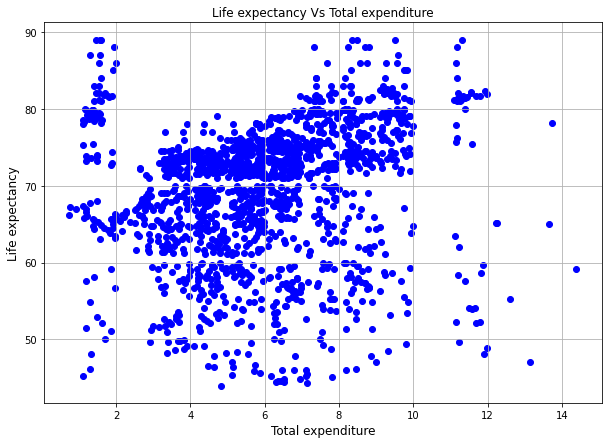

In [15]:
plt.figure(figsize=(10,7))
plt.scatter(data['Total expenditure'], data['Life expectancy'], color='blue')
plt.title('Life expectancy Vs Total expenditure', fontsize=12)
plt.xlabel('Total expenditure', fontsize=12)
plt.ylabel('Life expectancy', fontsize=12)
plt.grid(True)
plt.show()

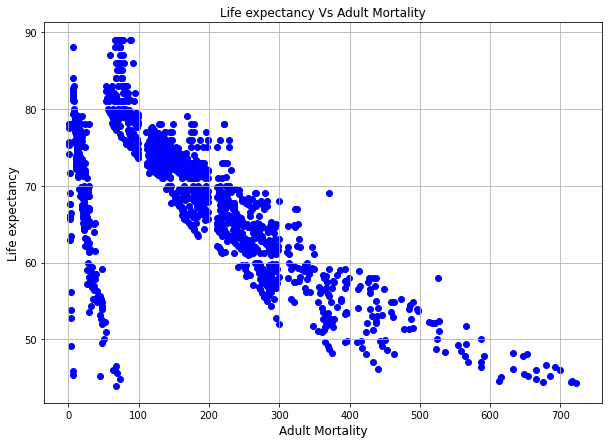

In [16]:
plt.figure(figsize=(10,7))
plt.scatter(data['Adult Mortality'], data['Life expectancy'], color='blue')
plt.title('Life expectancy Vs Adult Mortality', fontsize=12)
plt.xlabel('Adult Mortality', fontsize=12)
plt.ylabel('Life expectancy', fontsize=12)
plt.grid(True)
plt.show()

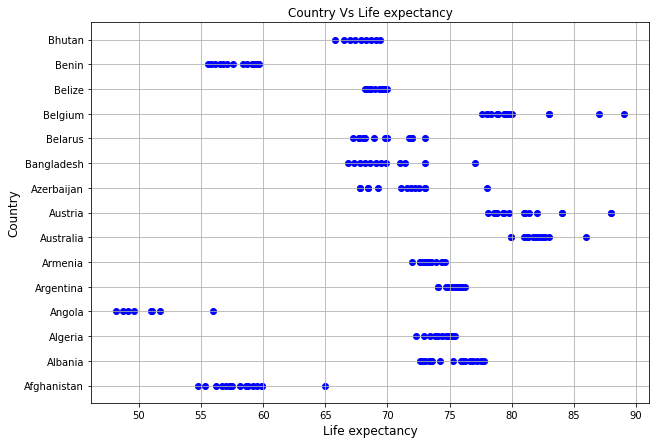

In [17]:
plt.figure(figsize=(10,7))
plt.scatter(data['Life expectancy'][:200], data['Country'][:200], color='blue')
plt.title('Country Vs Life expectancy', fontsize=12)
plt.xlabel('Life expectancy', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(True)
plt.show()

Insights:
Life expectancy by the country is having a spread of data. 
However, we can see that the blue spots marked for counties against age and majority its more than 65 

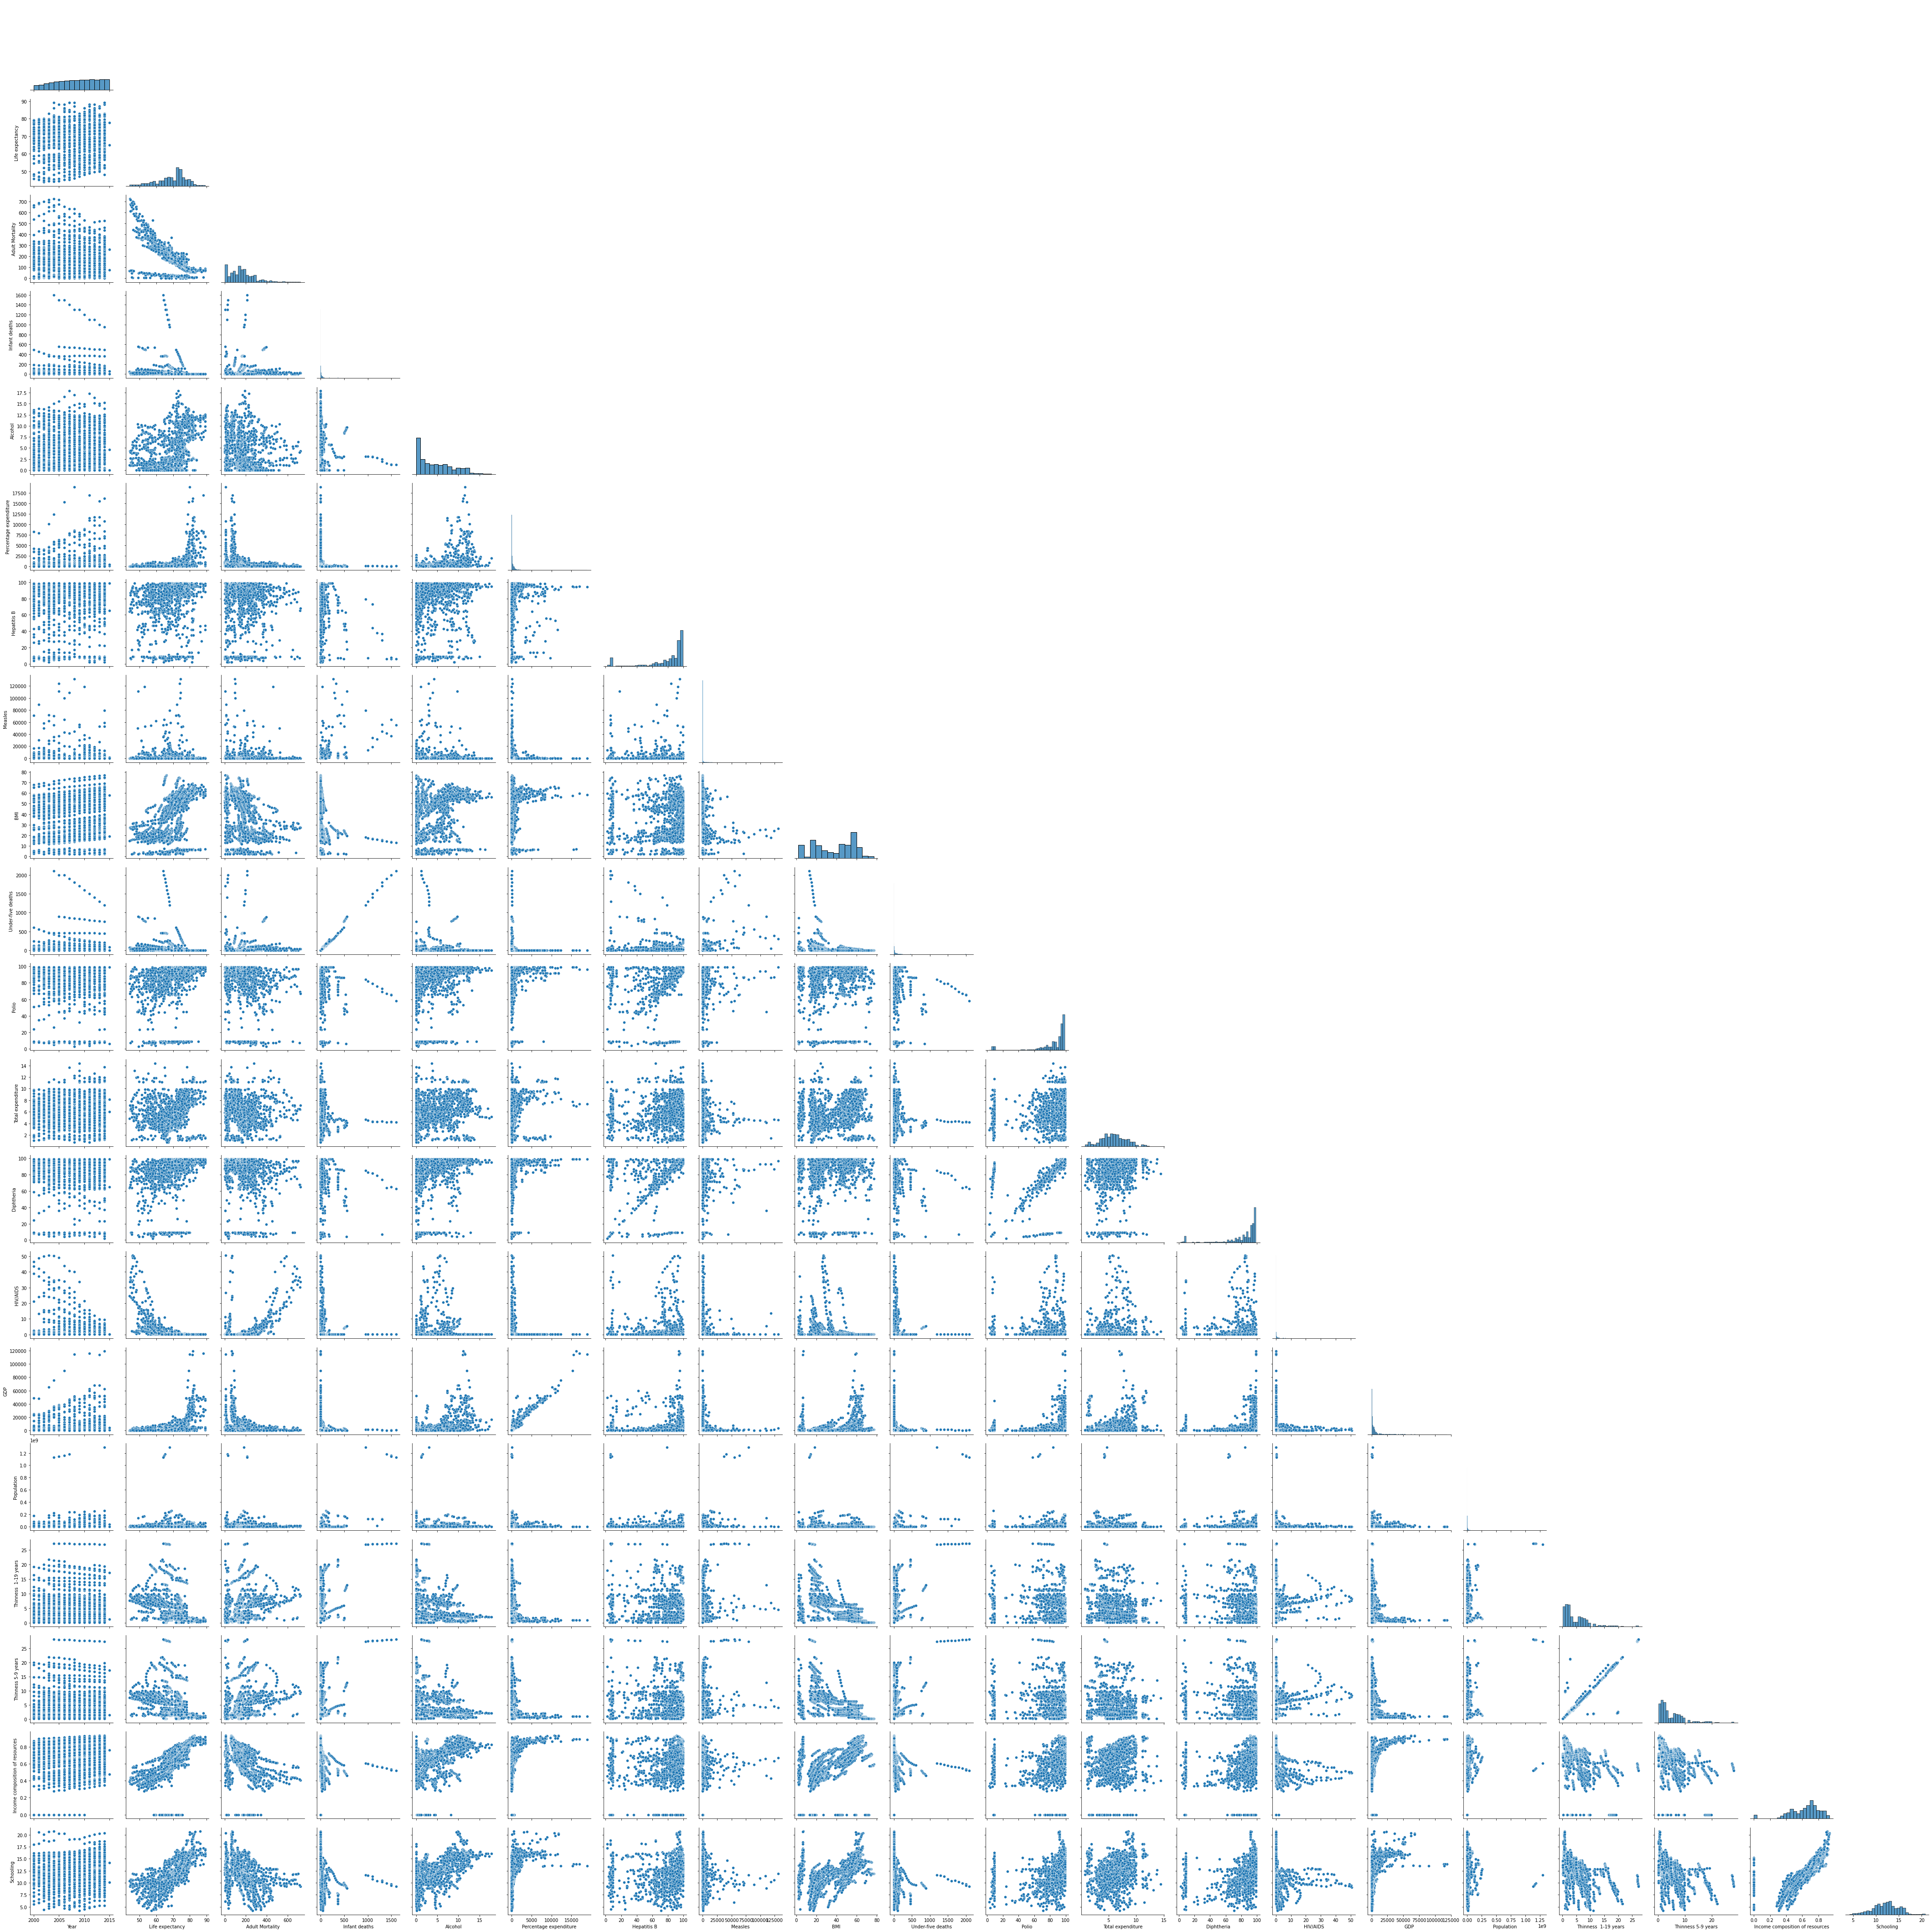

In [18]:
sns.pairplot(data, height=3, diag_kind='auto')
plt.show()

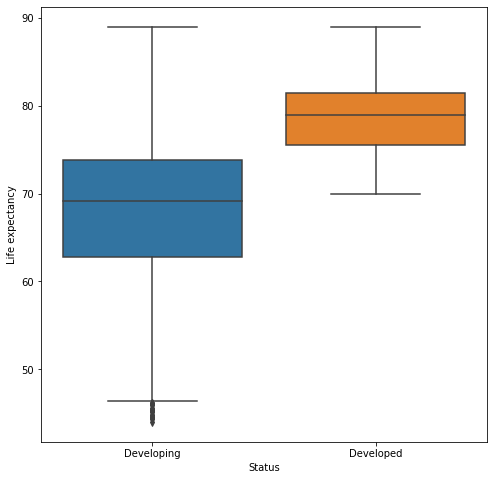

In [19]:
plt.figure(figsize=(8,8))
sns.boxplot(x="Status",y="Life expectancy",data=data)
plt.show()

Insights:
The life expectancy in the developed countries is much higher than the developing countries.
The median value of life expectancy 
Developing: 69 years
Developed: 78 years

In [20]:
data[data.columns[:]].corr()['Life expectancy'][:]

Year                               0.050771
Life expectancy                    1.000000
Adult Mortality                   -0.702523
Infant deaths                     -0.169074
Alcohol                            0.402718
Percentage expenditure             0.409631
Hepatitis B                        0.199935
Measles                           -0.068881
BMI                                0.542042
Under-five deaths                 -0.192265
Polio                              0.327294
Total expenditure                  0.174718
Diphtheria                         0.341331
HIV/AIDS                          -0.592236
GDP                                0.441322
Population                        -0.022305
Thinness  1-19 years              -0.457838
Thinness 5-9 years                -0.457508
Income composition of resources    0.721083
Schooling                          0.727630
Name: Life expectancy, dtype: float64

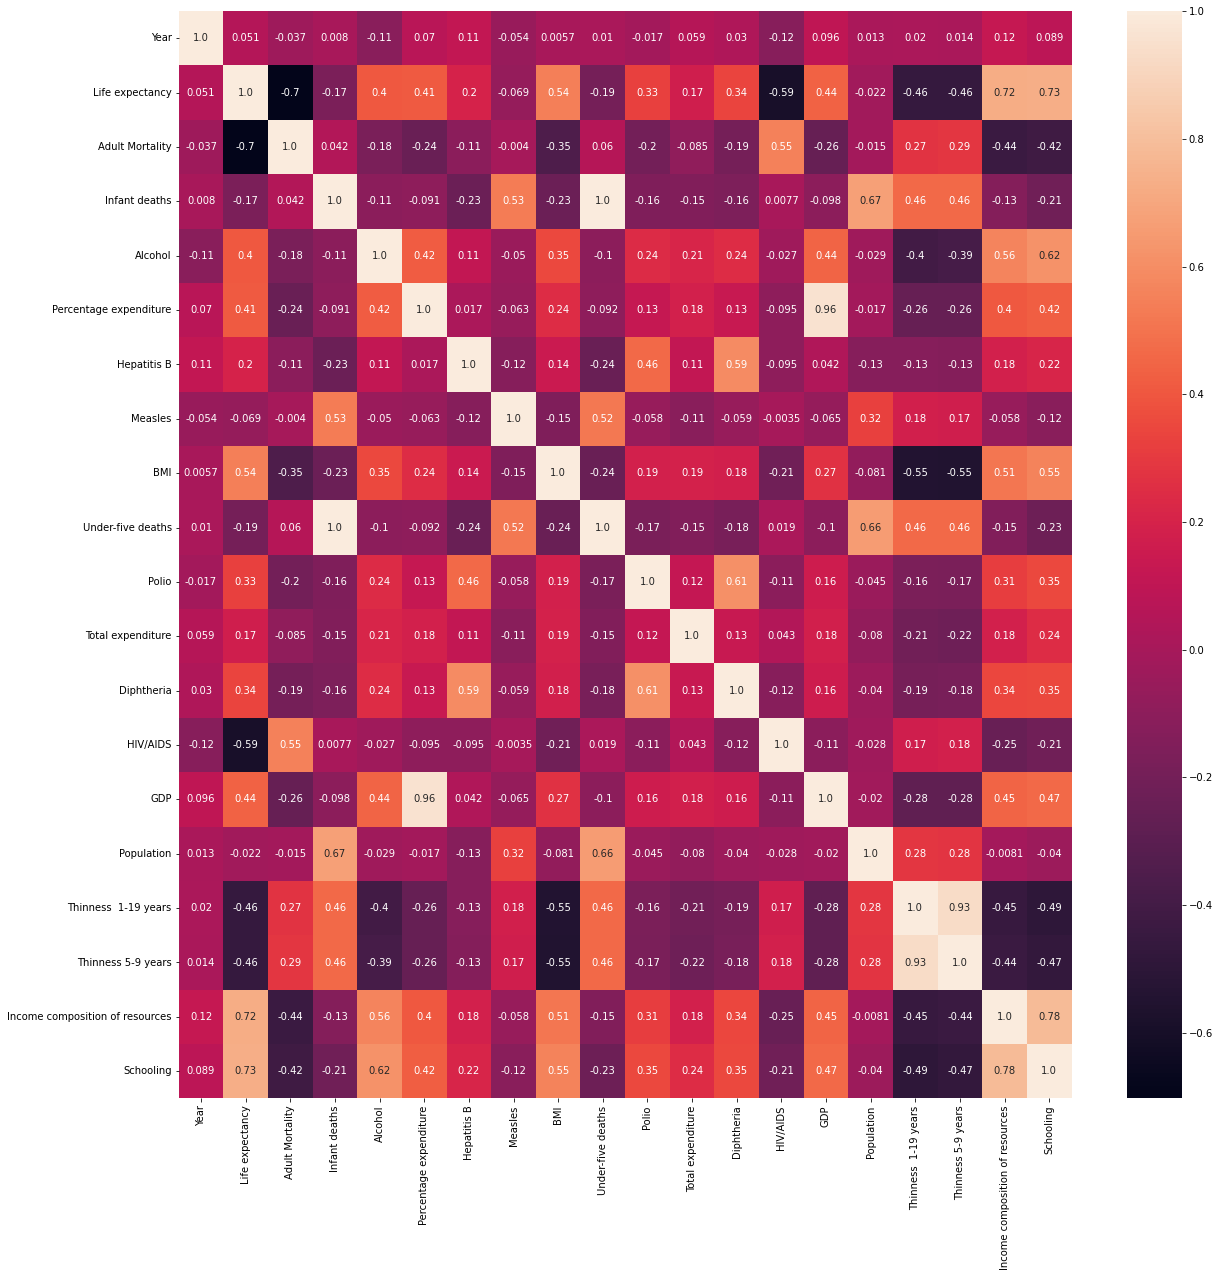

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, fmt=".2")
plt.show()

Data Preparation

In [22]:
X = data.drop('Life expectancy', axis=1)
y = data[['Life expectancy']]

print(X.head())
print(y.head())

       Country  Year      Status  Adult Mortality  Infant deaths  Alcohol  \
0  Afghanistan  2015  Developing            263.0             62     0.01   
1  Afghanistan  2014  Developing            271.0             64     0.01   
2  Afghanistan  2013  Developing            268.0             66     0.01   
3  Afghanistan  2012  Developing            272.0             69     0.01   
4  Afghanistan  2011  Developing            275.0             71     0.01   

   Percentage expenditure  Hepatitis B  Measles   BMI  ...  Polio  \
0               71.279624         65.0     1154  19.1  ...    6.0   
1               73.523582         62.0      492  18.6  ...   58.0   
2               73.219243         64.0      430  18.1  ...   62.0   
3               78.184215         67.0     2787  17.6  ...   67.0   
4                7.097109         68.0     3013  17.2  ...   68.0   

   Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0               8.16        65.0       0.1  584.2592

In [23]:
X = data.drop('Life expectancy', axis=1)
y = data[['Life expectancy']]

print(X.head())
print(y.head())

       Country  Year      Status  Adult Mortality  Infant deaths  Alcohol  \
0  Afghanistan  2015  Developing            263.0             62     0.01   
1  Afghanistan  2014  Developing            271.0             64     0.01   
2  Afghanistan  2013  Developing            268.0             66     0.01   
3  Afghanistan  2012  Developing            272.0             69     0.01   
4  Afghanistan  2011  Developing            275.0             71     0.01   

   Percentage expenditure  Hepatitis B  Measles   BMI  ...  Polio  \
0               71.279624         65.0     1154  19.1  ...    6.0   
1               73.523582         62.0      492  18.6  ...   58.0   
2               73.219243         64.0      430  18.1  ...   62.0   
3               78.184215         67.0     2787  17.6  ...   67.0   
4                7.097109         68.0     3013  17.2  ...   68.0   

   Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0               8.16        65.0       0.1  584.2592

In [24]:
print(X.shape)
print(y.shape)

(1649, 21)
(1649, 1)


In [25]:
X = pd.get_dummies(X, columns=['Country', 'Status'])
X.head()

,Year,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,...,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,0,0,0,0,0,0,0,0,0,1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,0,0,0,0,0,0,0,0,0,1
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,0,0,0,0,0,0,0,0,0,1
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,0,0,0,0,0,0,0,0,0,1
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
X = X.values
y = y.values

In [28]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Model Train and Evaluate

In [29]:
from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCOefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(X_test)      

Intercept of the linear equation: [-370.39923124]

COefficients of the equation are: [[ 2.18341199e-01 -4.25965013e-04  7.28152556e-02 -1.15746792e-01
  -3.63099183e-05  1.99567276e-03 -4.41704001e-06 -5.08329529e-03
  -5.66462873e-02 -8.57848344e-04 -1.73216361e-02  2.20806075e-03
  -2.78374208e-01 -4.82283076e-07  1.96856043e-09  1.03678485e-02
   5.67478084e-02  5.30963000e-01  4.05983164e-01 -8.78321508e+00
   7.46457659e+00  4.92555584e+00 -1.42658385e+01  6.01520189e+00
   5.88048190e+00  1.94391019e+00  3.65381015e+00  2.32870327e+00
   1.41649358e+00  2.22867048e+00  1.59959048e+00  1.57736879e+00
  -8.60376694e+00 -2.24478640e+00  7.87205971e+00 -8.02143729e+00
   4.38559560e+00 -4.76806308e+00 -7.54778995e+00 -9.85626478e+00
   4.38903311e+00 -2.03678252e+00 -1.00404780e+01  1.34596803e+01
  -1.29481469e+01 -1.23459633e+01  1.06404340e+01  5.31590667e+00
   5.66500449e+00 -5.58832516e+00  1.08326967e+01 -1.71393791e+00
   1.51385519e+00 -3.68586687e+00  4.92769108e+00  6.6436

In [30]:
# Mean Absolute Error
mean_absolute_error(y_test, pred)

1.2243719630055148

In [31]:
# RMSE
mean_squared_error(y_test, pred)**0.5

2.075715884373355

In [32]:
# R2 Squared:
r2_score(y_test, pred)

0.9454598217591664

In [33]:
# Training Score
linearregression.score(X_train, y_train)

0.9723226823336292

In [34]:
# Testing score
linearregression.score(X_test, y_test)

0.9454598217591664

In [35]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': pred.flatten()})
df

,Actual,Predicted
0,67.5,67.680534
1,73.8,73.785661
2,79.1,80.160082
3,54.9,53.138555
4,48.6,51.046567
...,...,...
490,64.8,65.959530
491,71.4,72.459268
492,77.2,77.069198
493,78.6,77.934372


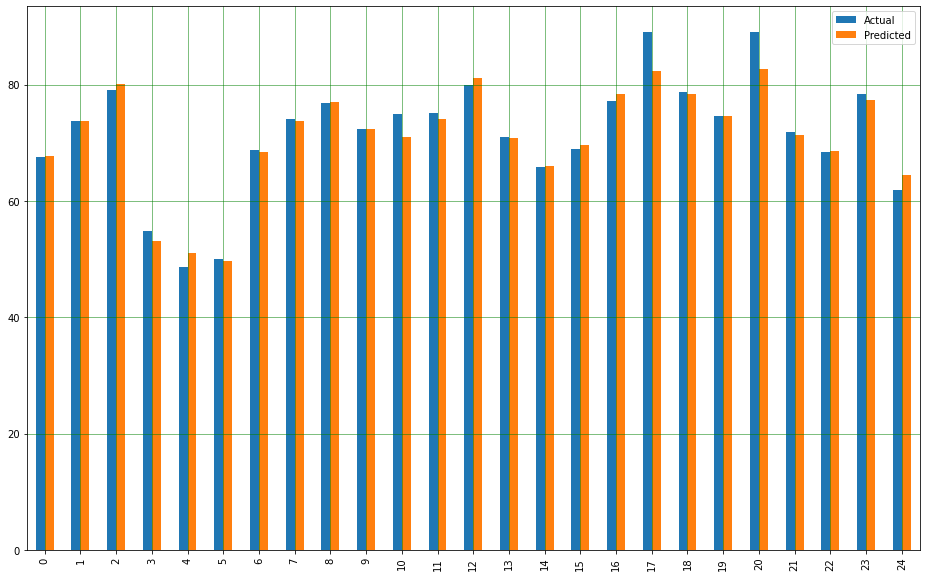

In [36]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
The Training and testing scores are around 95% and both scores are comparable, hence the model is a good fit.

R2_score is 0.945 in the dataset.